In [33]:
# build a network to classify Reuters newswires into 46 mutually exclusive topics
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
import numpy as np
# variables
np.transpose(train_data[1])

array([   1, 3267,  699, 3434, 2295,   56,    2, 7511,    9,   56, 3906,
       1073,   81,    5, 1198,   57,  366,  737,  132,   20, 4093,    7,
          2,   49, 2295,    2, 1037, 3267,  699, 3434,    8,    7,   10,
        241,   16,  855,  129,  231,  783,    5,    4,  587, 2295,    2,
          2,  775,    7,   48,   34,  191,   44,   35, 1795,  505,   17,
         12])

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[1]])
decoded_newswire

'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [16]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [19]:
from keras import models
from keras.layers import Dense

model = models.Sequential()

# to obtain enough features, we have to set number of units of
# hidden layers larger than that of the final output
model.add(Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(Dense(64, activation = 'relu'))
# dimension of target is 46, so we need to have 46 unit outputs
model.add(Dense(46, activation = 'softmax'))

In [20]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
# without one hot encoding target variable, we should instead use
# "sparse_categorical_crossentropy" as the loss function

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 206us/step - loss: 2.5347 - accuracy: 0.5336 - val_loss: 1.6445 - val_accuracy: 0.6580
Epoch 2/20
7982/7982 [==============================] - 1s 153us/step - loss: 1.3578 - accuracy: 0.7220 - val_loss: 1.2558 - val_accuracy: 0.7310
Epoch 3/20
7982/7982 [==============================] - 1s 157us/step - loss: 1.0116 - accuracy: 0.7859 - val_loss: 1.1032 - val_accuracy: 0.7560
Epoch 4/20
7982/7982 [==============================] - 1s 162us/step - loss: 0.7966 - accuracy: 0.8302 - val_loss: 1.0201 - val_accuracy: 0.7810
Epoch 5/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.6340 - accuracy: 0.8667 - val_loss: 0.9461 - val_accuracy: 0.8000
Epoch 6/20
7982/7982 [==============================] - 1s 152us/step - loss: 0.5043 - accuracy: 0.8941 - val_loss: 0.9089 - val_accuracy: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 147us/step - loss

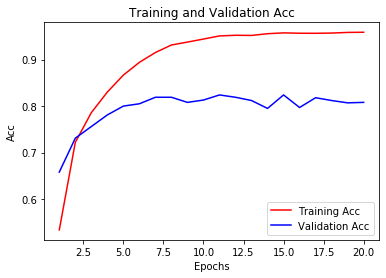

In [27]:
import matplotlib.pyplot as plt

history_dict = history.history
# plotting the training accuracy/validation accuracy of keras model
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, acc, color='r', label='Training Acc')
plt.plot(epochs, val_acc, color='b', label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [28]:
predictions = model.predict(x_test)

In [31]:
predictions[0]

array([4.69726547e-05, 6.20465173e-08, 1.15410792e-10, 9.79564011e-01,
       1.72592364e-02, 8.32036662e-09, 5.74079820e-07, 1.84188906e-07,
       4.03556012e-04, 5.17266972e-06, 7.54773509e-07, 1.50173428e-05,
       6.09577182e-06, 1.39325573e-06, 7.92573616e-08, 1.62515601e-09,
       1.27971207e-05, 4.60961530e-07, 2.03650120e-06, 2.25115509e-04,
       2.38398206e-03, 2.85429778e-05, 1.33489575e-09, 1.08014433e-07,
       1.30073685e-08, 5.88923569e-07, 1.97129468e-09, 3.78880941e-07,
       1.03952823e-06, 1.02372569e-05, 6.34378239e-06, 4.31356106e-09,
       4.47734055e-06, 7.68870265e-08, 4.08897677e-06, 6.20974618e-07,
       1.32597634e-05, 3.11182440e-08, 5.17970648e-07, 1.39404654e-06,
       7.06631056e-08, 4.35166186e-07, 1.28628538e-10, 1.19496789e-07,
       1.71120117e-13, 1.73121407e-07], dtype=float32)

In [32]:
np.argmax(predictions[0])

3